# Learning goals

- Load data from a file to DataFrame
- Create a DataFrame from python list/map
- How to pass column names to dataframe
- Select columns using column name
- Select columns using row indexes
- Handle NaN using inputation
- Drop NaN from data
- Aggregate data on single and multiple columns
- Aggregate by multiple fields
- Apply function on single column and entire row
- Sort dataframe
- Filter
- Joining dataframes

In [1]:
import pandas as pd
import numpy as np

# Loading data from csv file into a dataframe

In [2]:
data = pd.read_csv("/data/mobile-sales-data.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
type(data)

pandas.core.frame.DataFrame

# Inspect column types and null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [5]:
data.sample(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
3,Spain,38.0,61000.0,No
6,Spain,NaN,52000.0,No
2,Germany,30.0,54000.0,No
9,France,37.0,67000.0,Yes


In [6]:
data.shape

(10, 4)

In [7]:
data["Salary"]

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

In [8]:
data.iloc[:, 2]

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

In [9]:
c = data["Salary"]

In [10]:
c.min(), c.max(), c.median()

(48000.0, 83000.0, 61000.0)

In [11]:
data[5:8]

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes


In [12]:
data.iloc[5:8, [0, 3]]

,Country,Purchased
5,France,Yes
6,Spain,No
7,France,Yes


In [13]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [14]:
data.iloc[:, [0, 3]]

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes
5,France,Yes
6,Spain,No
7,France,Yes
8,Germany,No
9,France,Yes


In [15]:
data[["Country", "Purchased"]]

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes
5,France,Yes
6,Spain,No
7,France,Yes
8,Germany,No
9,France,Yes


In [16]:
data["Country"].apply(lambda s:s.upper())

0     FRANCE
1      SPAIN
2    GERMANY
3      SPAIN
4    GERMANY
5     FRANCE
6      SPAIN
7     FRANCE
8    GERMANY
9     FRANCE
Name: Country, dtype: object

In [17]:
data["COUNTRY"] = data["Country"].apply(lambda s:s.upper())
data

,Country,Age,Salary,Purchased,COUNTRY
0,France,44.0,72000.0,No,FRANCE
1,Spain,27.0,48000.0,Yes,SPAIN
2,Germany,30.0,54000.0,No,GERMANY
3,Spain,38.0,61000.0,No,SPAIN
4,Germany,40.0,NaN,Yes,GERMANY
5,France,35.0,58000.0,Yes,FRANCE
6,Spain,NaN,52000.0,No,SPAIN
7,France,48.0,79000.0,Yes,FRANCE
8,Germany,50.0,83000.0,No,GERMANY
9,France,37.0,67000.0,Yes,FRANCE


In [18]:
data["SalAge"] = data.apply(lambda row: row["Salary"] / row["Age"], axis = 1)
data

,Country,Age,Salary,Purchased,COUNTRY,SalAge
0,France,44.0,72000.0,No,FRANCE,1636.363636
1,Spain,27.0,48000.0,Yes,SPAIN,1777.777778
2,Germany,30.0,54000.0,No,GERMANY,1800.000000
3,Spain,38.0,61000.0,No,SPAIN,1605.263158
4,Germany,40.0,NaN,Yes,GERMANY,NaN
5,France,35.0,58000.0,Yes,FRANCE,1657.142857
6,Spain,NaN,52000.0,No,SPAIN,NaN
7,France,48.0,79000.0,Yes,FRANCE,1645.833333
8,Germany,50.0,83000.0,No,GERMANY,1660.000000
9,France,37.0,67000.0,Yes,FRANCE,1810.810811


In [19]:
del(data["COUNTRY"])
del(data["SalAge"])
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [20]:
data.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [21]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [22]:
data.dropna(axis=1)

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes
5,France,Yes
6,Spain,No
7,France,Yes
8,Germany,No
9,France,Yes


In [23]:
data.fillna(data.mean())

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [24]:
data["Age"].mean(), data["Salary"].mean()

(38.77777777777778, 63777.77777777778)

In [25]:
data.mean()

Age          38.777778
Salary    63777.777778
dtype: float64

In [26]:
data.fillna({"Age": 38.0,"Salary": 63777})

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63777.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [27]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [28]:
data["Age"].values

array([ 44.,  27.,  30.,  38.,  40.,  35.,  nan,  48.,  50.,  37.])

In [29]:
data["Purchased"].value_counts()

Yes    5
No     5
Name: Purchased, dtype: int64

In [30]:
data.median()

Age          38.0
Salary    61000.0
dtype: float64

In [31]:
data.groupby("Country").median()

,Age,Salary
Country,,
France,40.5,69500.0
Germany,40.0,68500.0
Spain,32.5,52000.0


In [32]:
data.groupby("Country")["Age"].median()

Country
France     40.5
Germany    40.0
Spain      32.5
Name: Age, dtype: float64

In [33]:
data.groupby("Country")["Age"].agg([np.mean, np.median])

,mean,median
Country,,
France,41.0,40.5
Germany,40.0,40.0
Spain,32.5,32.5


In [34]:
data.groupby("Country").agg({"Age": np.mean, "Salary": np.median})

,Age,Salary
Country,,
France,41.0,69500.0
Germany,40.0,68500.0
Spain,32.5,52000.0


In [35]:
data.groupby(["Country", "Purchased"]).mean()

Age   Salary
Country Purchased               
France  No         44.0  72000.0
        Yes        40.0  68000.0
Germany No         40.0  68500.0
        Yes        40.0      NaN
Spain   No         38.0  56500.0
        Yes        27.0  48000.0

In [36]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [37]:
data = data.fillna(data.median())

In [38]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Dummy variables to handle categorical variables

In [39]:
data2 =  pd.get_dummies(data, columns=["Country"])

In [40]:
del(data2["Purchased"])

In [41]:
pd.DataFrame(data2.values)

,0,1,2,3,4
0,44.0,72000.0,1.0,0.0,0.0
1,27.0,48000.0,0.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0
4,40.0,61000.0,0.0,1.0,0.0
5,35.0,58000.0,1.0,0.0,0.0
6,38.0,52000.0,0.0,0.0,1.0
7,48.0,79000.0,1.0,0.0,0.0
8,50.0,83000.0,0.0,1.0,0.0
9,37.0,67000.0,1.0,0.0,0.0


### Normalize

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
data2_std = ss.fit_transform(data2.values)

In [44]:
pd.DataFrame(data2_std, columns = data2.columns)

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,0.769734,0.772568,1.224745,-0.654654,-0.654654
1,-1.699225,-1.408800,-0.816497,-0.654654,1.527525
2,-1.263526,-0.863458,-0.816497,1.527525,-0.654654
3,-0.101663,-0.227226,-0.816497,-0.654654,1.527525
4,0.188803,-0.227226,-0.816497,1.527525,-0.654654
5,-0.537362,-0.499897,1.224745,-0.654654,-0.654654
6,-0.101663,-1.045239,-0.816497,-0.654654,1.527525
7,1.350666,1.408800,1.224745,-0.654654,-0.654654
8,1.641132,1.772361,-0.816497,1.527525,-0.654654
9,-0.246896,0.318116,1.224745,-0.654654,-0.654654


### Sort

In [45]:
data.sort_values("Salary", ascending=False)

,Country,Age,Salary,Purchased
8,Germany,50.0,83000.0,No
7,France,48.0,79000.0,Yes
0,France,44.0,72000.0,No
9,France,37.0,67000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
2,Germany,30.0,54000.0,No
6,Spain,38.0,52000.0,No
1,Spain,27.0,48000.0,Yes


### Filter

In [46]:
data = pd.read_csv("/data/mobile-sales-data.csv")
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [47]:
data[data["Country"] == "Spain"]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
6,Spain,NaN,52000.0,No


In [48]:
data.query("Country == 'Spain'")

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
6,Spain,NaN,52000.0,No


### Joining Data

Find top 10 movies based on highest average rating. Consider only those movies that have received at least 100 ratings. Display movieId, title and average rating.

In [49]:
movies = pd.read_csv("/data/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [50]:
ratings = pd.read_csv("/data/ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [51]:
joined = pd.merge(movies, ratings, on="movieId")
joined.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [52]:
(joined
.groupby(["movieId", "title"])
.rating
.agg([len, np.mean])
.query("len >= 100")
.sort_values("mean", ascending = False)
.head(10)
.reset_index()[["movieId", "title", "mean"]]
)

,movieId,title,mean
0,858,"Godfather, The (1972)",4.487500
1,318,"Shawshank Redemption, The (1994)",4.487138
2,1221,"Godfather: Part II, The (1974)",4.385185
3,50,"Usual Suspects, The (1995)",4.370647
4,527,Schindler's List (1993),4.303279
5,1193,One Flew Over the Cuckoo's Nest (1975),4.256944
6,608,Fargo (1996),4.256696
7,296,Pulp Fiction (1994),4.256173
8,2858,American Beauty (1999),4.236364
9,58559,"Dark Knight, The (2008)",4.235537


In [53]:
df = pd.read_csv("https://api.blockchain.info/charts/market-price?format=csv")
df.columns=["date", "price"]
df["datetime"] = pd.to_datetime(df["date"])
del df["date"]
df = df.set_index("datetime")
df.head()

,price
datetime,
2016-12-11,768.303125
2016-12-12,777.006875
2016-12-13,778.493500
2016-12-14,774.897000
2016-12-15,776.752150


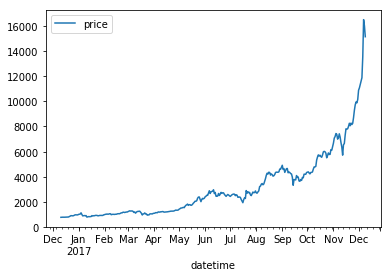

In [54]:
%matplotlib inline
df.plot()